In [106]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
import numpy as np
import datetime
import codecs

from keras import models
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
import webbrowser
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from matplotlib import font_manager, rc
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from selenium.webdriver.common.keys import Keys

In [10]:
options = Options()
options.headless = True  # //// 이 구문을 실행시키면 window 화면에 실행 없이 Background에서 실행된다.

In [11]:
browser = webdriver.Chrome('C:/Users/user/Downloads/chromedriver_win32/chromedriver')
# 직접 실행시키고
browser.implicitly_wait(0.2)  # 1초 휴식

url = 'https://play.google.com/store/apps/details?id=com.hanaskcard.paycla&showAllReviews=true'  # +page_num+str(a)
print(url)
browser.get(url)
time.sleep(0.5)

#최신목록으로 바꾸는 코드
browser.find_element_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[2]/c-wiz/div[1]/div/div[1]/div[2]/span').click()

browser.find_element_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[2]/c-wiz/div[1]/div/div[2]/div[1]/span').click()

#스크롤 내리는 코드
last_page_height = browser.execute_script("return document.documentElement.scrollHeight")

https://play.google.com/store/apps/details?id=com.hanaskcard.paycla&showAllReviews=true


In [12]:
for b in range(10):
    for a in range(10):
        browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.0)
        new_page_height = browser.execute_script("return document.documentElement.scrollHeight")
        if(new_page_height==last_page_height):
            break
        last_page_height = new_page_height
    time.sleep(5.0)
    #더 보기 클릭하는 코드
    
    print(browser.find_element_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[2]/div[2]/div').send_keys(Keys.ENTER))

#fcxH9b > div.WpDbMd > c-wiz > div > div.ZfcPIb > div > div > main > div > div.W4P4ne > div:nth-child(2) > div > div:nth-child(1) > div > div.d15Mdf.bAhLNe > div.UD7Dzf > span:nth-child(1)

None
None
None
None
None
None
None
None
None
None


In [14]:
soup = BeautifulSoup(browser.page_source, 'lxml')
div_reviews = soup.find_all('div', {'class':'d15Mdf bAhLNe'})
hana_title=[]
hana_grade_list=[]
for div in div_reviews:

    first_lists = div.findAll('span', {'jsname' : 'bN97Pc'})
    hana_title.append(first_lists)


    grade = len(div.findAll('div', {'class' : 'vQHuPe bUWb7c'}))
    hana_grade_list.append(grade)



In [75]:
woori

,content,score
0,갤럭시A8 안드로이드9 버전 입니다. 지난주 토요일부터 앱을 실행하면 앱이 계속 중...,3
1,우리은행 공인인증서가 없어서 타행인증서 등록하기 눌렀더니 보안카드는 우리은행걸로 입...,1
2,"주계좌가 여기랑 국민은행인데, 여긴 앱 자체가 처음 가입부터 공인인증서 등 너무 많...",1
3,후짐. 쓰레기.,1
4,지문인식 로그인 하려닌까 사용자 토큰 검증에 실패하였습니다 라고 뜨는데 이거 왜 갑...,1
...,...,...
1675,어플을 만들때 통일적으로 이름을 정할순 없나 원터치 알림등은 한글로 되어있어 우리로...,1
1676,이제부터 사용하려구요..,4
1677,업데이트 하니까 좋네여,4
1678,굿,5


{'앱': 1359, '사용': 1070, '은행': 1053, '계좌': 727, '수': 692, '플': 562, '인증': 562, '편리': 519, '거': 498, '것': 488, '뱅킹': 437, '로그인': 403, '번호': 401, '이체': 399, '카드': 398, '때': 372, '번': 358, '이용': 351, '불편': 350, '오류': 318, '화면': 305, '확인': 298, '등록': 280, '거래': 275, '업데이트': 270, '가입': 253, '기능': 247, '이벤트': 237, '스타': 230, '뱅크': 226, '게': 223, '하나': 218, '데': 209, '가능': 209, '설치': 205, '인식': 204, '입력': 197, '후': 185, '메뉴': 182, '신분증': 181, '실행': 177, '지문': 176, '폰': 173, '문제': 173, '국민은행': 172, '개': 169, '점': 167, '토스': 164, '일': 163, '금융': 160, '공인': 160, '시간': 158, '주': 157, '정보': 157, '조회': 156, '보안': 150, '신한': 150, '비밀': 148, '통장': 146, '접속': 142, '개선': 140, '증서': 139, '필요': 135, '삭제': 135, '전': 133, '돈': 133, '로딩': 132, '건': 124, '시': 124, '고객': 123, '건지': 123, '짜증': 122, '적금': 120, '제': 119, '내': 119, '처음': 118, '생각': 117, '분': 117, '나': 117, '연결': 113, '이상': 112, '본인': 110, '카카오': 108, '수수료': 106, '개설': 106, '전화': 106, '내역': 106, '농협': 106, '서비스': 105, '해결': 104, '송금': 104, '결제': 10

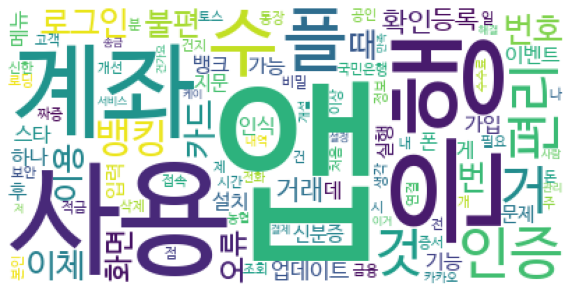

In [223]:

galexy_stop_words = r"외 등 만 명 원 천 억 년 월 대 중 조 . ' 3"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

# 불용어 제거
corpus = []
for post in df_train['review'].values:
    for noun in mecab.nouns(post): #문장을 명사로 바꾼다.
        if noun not in galexy_stop_words: #filter로 필요없는 명사만 걸러낸다.
            corpus.append(noun)


from collections import Counter
num_top_nouns = 100
corpus_counter = Counter(corpus)
corpus_top_nouns = dict(corpus_counter.most_common(num_top_nouns))
print(corpus_top_nouns)

from wordcloud import WordCloud
corpus_wc = WordCloud(background_color="white", font_path='./../../nlp_class_day2-master/nlp_class_day2-master/font/NanumBarunGothic.ttf')
corpus_wc.generate_from_frequencies(corpus_top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(corpus_wc)

In [93]:
df_train=pd.read_csv('은행 취합본.csv')

In [95]:
target=df_train['label']

In [97]:
df_train=df_train.drop('label',axis=1)

In [98]:
df_train

,review,star
0,확실합니다.,5
1,편리하게 잘 이용하고 있습니다,5
2,"로그인 따로 안해서 편하지만, 이체할때 너무 불편해요. 요즘 지문으로 이체하거나 승...",1
3,시간절약해좋아요,5
4,이정도면 훌륭하다,5
...,...,...
3595,SBI저축은행사이다뱅크도 잔액표시 지원해주시면 감사하겠슴니다.,4
3596,이벤트 도 점점 안하고 지원금 모으기 같이 각종 이벤트도 이제 종료 해요,1
3597,입출금 내역에서 검색좀 할 수 있게 해주세요 일일히 내려가면서 찾기 힘듭니다,3
3598,앱을 이용할때 자꾸 그래픽이 깨져보여요,3


In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
enc = OneHotEncoder()

In [107]:
Y=np.array(target).reshape(-1,1)
enc.fit(Y)
Y_onehot = enc.transform(Y).toarray()

In [110]:
Y_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [112]:
word_to_vector=[]
for post in df_train['review'].values:
    noun=mecab.morphs(post)
    word_to_vector.append(noun)

In [127]:
import re

In [132]:
temp=[]
for x in word_to_vector:
    string_temp=" ".join(x)
    string_temp=re.sub(r'[^가-힣0-9]',' ',string_temp)
    temp.append(string_temp)
print(temp)

['확실 합니다  ', '편리 하 게 잘 이용 하 고 있 습니다', '로그인 따로 안 해서 편하 지만   이체 할 때 너무 불편 해요   요즘 지문 으로 이체 하 거나 승인 하 는 편의 성 있 는 결제 시스템 이 얼마나 많 은데 지하철 에서 도 비밀 번호 를 눌러 가 면서 비밀 번호 써야 하 나요   비밀 번호 에 보안 카드 까지 누를 때 마다 주변 에서 누가 쳐다보 는 건 아닌지 두리번 거려 야 하 는 불편 함 좀 개선 해 주 세요   지문 이라던지 지문   보안 카드 라던지 변경 건 검토 좀 요', '시간 절약 해 좋 아요', '이 정도 면 훌륭 하 다', '신박 퀴즈 맞추 면 3   100 포인트 중 에 적립 이 라는 데 5 이상 받 아 본 적 이 없 어요 사기 네요     문 의 글 없 어서 여기 다 올립니다', '진행 않 됨', '밑 에 사용 자 들 다 광고 인 거 같 은데        다 신한 직원 이 신가요      시청 에서 하 는 프로그램 때문 에 계좌 연결 을 위해 깔 았 는데요   사진 하나 분석 도 제대로 못 해   이거 에 만 1 시간 가까이 날린 거 같 은데     상 담사 조차 도 얘기 본질 파악 을 못 해   투자 유도 에   어 플 자체 도 답답 해   이러 니까 국민 쓰 지   ', '카카오 뱅크 처럼 은행 앱 과 푸시 알림 앱 을 합쳐 주 실 생각 은 없 으신 지요  ', '    올스타 이벤트 와 관련 해서   체크카드 를 신청 하 면 별 4 개 를 준다고 해서 신청 했 는데 계속 신청 하 기   이미 신청 한 카드 라는 말 만 뜨 고 별 을 받 지 못했 습니다   왜 이런 건가요  ', '포인트 모으 는 재미 가       ', '전원 이 꺼졌 다 키 면 앱 이 사 라 지내 요 많이 불편 해요', '      ', '전반 적 으로 만족 합니다', '패드 로 는 사용 이 안 됩니다    ', '업 뎃돔그만해라', '듀얼 심 에서 유심 인식 을 못 하 는 오류 가 있 습니다  ', '신한은행 쏠 단골 은행 이 라 아주 잘 사용

In [115]:
model.wv['짜증']

array([ 1.84034735e-01,  5.44695377e-01,  6.77573681e-02, -1.36292070e-01,
       -3.13423365e-01,  1.60121441e-01, -8.16498280e-01, -2.20265478e-01,
        1.05080925e-01, -3.56209904e-01,  8.63210633e-02,  5.81490807e-02,
       -3.57072681e-01,  1.22503109e-01,  1.79981098e-01,  9.40658450e-02,
        4.45726633e-01,  2.26324901e-01,  4.00400519e-01,  2.69627392e-01,
       -6.61519647e-01, -4.24666703e-01, -3.15564126e-02,  2.96398789e-01,
        3.83364052e-01,  5.67623451e-02,  8.94750431e-02, -1.91091865e-01,
        6.81397989e-02, -5.78144677e-02, -4.26203549e-01,  1.50745764e-01,
        7.12807663e-03,  1.20915473e-01,  2.66166031e-01,  1.34354502e-01,
       -3.61057758e-01,  1.15941681e-01, -3.88603479e-01, -1.30315840e-01,
       -7.70153642e-01, -1.35682330e-01, -3.71608526e-01, -8.41749847e-01,
        2.10752055e-01, -4.65266369e-02,  5.07301450e-01, -2.64168471e-01,
       -1.27065650e-04, -8.93096328e-01, -3.20101678e-01, -1.37974620e-01,
        3.71691048e-01,  

In [116]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding

In [380]:

token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(temp)       # 토큰화 함수에 문장 적용

In [381]:
x = token.texts_to_sequences(temp)

In [261]:
x

[[1186, 46],
 [44, 1, 14, 33, 70, 1, 2, 6, 22],
 [60,
  439,
  9,
  55,
  93,
  131,
  62,
  32,
  66,
  50,
  71,
  141,
  262,
  130,
  24,
  62,
  1,
  355,
  1101,
  1,
  4,
  558,
  294,
  6,
  4,
  236,
  526,
  3,
  690,
  80,
  168,
  3382,
  41,
  5,
  167,
  61,
  29,
  636,
  7,
  137,
  167,
  61,
  740,
  1,
  107,
  167,
  61,
  11,
  163,
  63,
  109,
  1856,
  66,
  253,
  2132,
  41,
  1043,
  2564,
  4,
  188,
  1651,
  3383,
  3384,
  263,
  1,
  4,
  71,
  117,
  81,
  175,
  37,
  30,
  73,
  130,
  2565,
  130,
  163,
  63,
  1857,
  317,
  188,
  2566,
  81,
  101],
 [154, 1274, 37, 17, 38],
 [3, 266, 23, 1491, 1, 35],
 [2567,
  1187,
  3385,
  23,
  193,
  794,
  566,
  91,
  11,
  1492,
  3,
  162,
  111,
  220,
  212,
  98,
  84,
  691,
  75,
  3,
  34,
  52,
  1493,
  18,
  835,
  68,
  767,
  34,
  65,
  519,
  35,
  2568],
 [295, 51, 191],
 [1102,
  11,
  19,
  203,
  45,
  35,
  549,
  77,
  47,
  43,
  168,
  35,
  164,
  741,
  3,
  3386,
  3387,
  41,
 

In [136]:
padded_x = pad_sequences(x, 100)

In [141]:
padded_x

array([[   0,    0,    0, ...,    0, 1186,   46],
       [   0,    0,    0, ...,    2,    6,   22],
       [   0,    0,    0, ..., 2566,   81,  101],
       ...,
       [   0,    0,    0, ...,  185,   28, 1798],
       [   0,    0,    0, ...,    3, 6164, 1604],
       [   0,    0,    0, ...,    4,   47,  512]])

In [139]:
len(Y_onehot)

3600

In [166]:
embedding=np.arange(3600,9)

In [170]:
for num in range(0,3600):
    for pos in range(9):
        temp3=np.append(padded_x[num],Y_onehot[num][pos]).tolist()
        embedding=np.append(embedding,temp3)

In [200]:
check=embedding.reshape(-1,9,101,1)

In [213]:
check.shape

(3600, 9, 101, 1)

In [218]:
model = models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (9,101,1)))

model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(6, activation = "softmax"))


In [219]:
from keras.utils import to_categorical
y = to_categorical(Y)
print(len(y))

3600


In [220]:
model.compile(optimizer='Adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
for num in range(0,3600):
    for pos in range(9):
        temp3=np.append(padded_x[num],Y_onehot[num][pos]).tolist()
        embedding=np.append(embedding,temp3)

In [222]:
model.fit(check, y, epochs=25, batch_size=32)

Epoch 1/25
113/113 [==============================] - 10s 87ms/step - loss: 0.6871 - accuracy: 0.7500
Epoch 2/25
113/113 [==============================] - 10s 92ms/step - loss: 0.6232 - accuracy: 0.7761
Epoch 3/25
113/113 [==============================] - 11s 94ms/step - loss: 0.6112 - accuracy: 0.7847
Epoch 4/25
113/113 [==============================] - 11s 94ms/step - loss: 0.5796 - accuracy: 0.7894
Epoch 5/25
113/113 [==============================] - 11s 94ms/step - loss: 0.5437 - accuracy: 0.8100
Epoch 6/25
113/113 [==============================] - 11s 94ms/step - loss: 0.5240 - accuracy: 0.8164
Epoch 7/25
113/113 [==============================] - 11s 94ms/step - loss: 0.4899 - accuracy: 0.8303
Epoch 8/25
113/113 [==============================] - 11s 95ms/step - loss: 0.4358 - accuracy: 0.8517
Epoch 9/25
113/113 [==============================] - 11s 94ms/step - loss: 0.4073 - accuracy: 0.8581
Epoch 10/25
113/113 [==============================] - 11s 94ms/step - loss: 0.378

In [334]:
test_sentence='로그인'
test_sentence=[test_sentence]
test = token.texts_to_sequences(test_sentence)
test = pad_sequences(test, 100)
test=np.append(test,1).astype(int)

pre=np.arange(9.101)
for x in range(9):
    test
    pre=np.append(pre,test)
pre=pre[9:-1]
#4차원으로 (a,b,c,d) 로 만들어야 2차원 행렬의 집합이 차원감소 없이 CNN계산 가능
pre= pre.reshape(-1,9,101,1)

model.predict(pre)

array([[4.2135866e-07, 1.4662009e-02, 4.2078909e-03, 3.7077959e-03,
        7.0337988e-02, 9.0708387e-01]], dtype=float32)

In [374]:
#인증 계좌, 로그인
dict={'신한':1,'하나':3,'우리':2,'국민':4,'기업':5,'농협':6,'케이':7,'카카오':8,'토스':9}
def search():
    print('검색 단어를 입력하세요')
    word=input()
    print('은행명을 입력하세요')
    bank=input()
    #검색 단어 리스트로 변환
    test_sentence=[word]
    test = token.texts_to_sequences(test_sentence)
    test = pad_sequences(test, 100)
    pre=np.empty(0)
    #리스트로 변환한 sequences 데이터에 은행정보 추가
    #특정 위치에만 1로 one-hot 인코딩값 부여
    for x in range(9):
        if x is dict[bank]:
            pre=np.append(pre,np.append(test,1).astype(int))
        else:
            pre=np.append(pre,np.append(test,0).astype(int))
    return pre

pre=search()

#4차원으로 (a,b,c,d) 로 만들어야 2차원 행렬의 집합이 차원감소 없이 CNN계산 가능
pre=pre.reshape(-1,9,101,1)

검색 단어를 입력하세요
보안
은행명을 입력하세요
토스
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 163.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

In [369]:
model.predict(pre)
            

array([[8.88249360e-07, 1.04081355e-01, 9.26853623e-03, 1.19983125e-02,
        7.47218728e-02, 7.99929082e-01]], dtype=float32)

In [371]:
kakao=search()
kakao=kakao.reshape(-1,9,101,1)
model.predict(kakao)

검색 단어를 입력하세요
속도
은행명을 입력하세요
카카오


array([[8.88249360e-07, 1.04081355e-01, 9.26853623e-03, 1.19983125e-02,
        7.47218728e-02, 7.99929082e-01]], dtype=float32)

In [399]:
shinhan=search()
#4차원으로 (a,b,c,d) 로 만들어야 2차원 행렬의 집합이 차원감소 없이 CNN계산 가능
shinhan=shinhan.reshape(-1,9,101,1)
model.predict(shinhan)


검색 단어를 입력하세요
수수료
은행명을 입력하세요
신한


array([[7.54242194e-07, 1.05850704e-01, 8.70196521e-03, 1.29166776e-02,
        7.42461979e-02, 7.98283696e-01]], dtype=float32)

In [375]:
model2 = models.Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (9,11,1)))

model2.add(BatchNormalization())
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.1))

model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dense(6, activation = "softmax"))

In [376]:
model2.compile(optimizer='Adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [382]:
padded_x2 = pad_sequences(x, 10)

In [379]:
x

8

In [383]:
embedding2=np.arange(3600,9)

In [384]:
for num in range(0,3600):
    for pos in range(9):
        temp3=np.append(padded_x2[num],Y_onehot[num][pos]).tolist()
        embedding2=np.append(embedding2,temp3)

In [385]:
check2=embedding2.reshape(-1,9,11,1)

In [386]:
model2.fit(check2, y, epochs=25, batch_size=32)

Epoch 1/25
113/113 [==============================] - 3s 23ms/step - loss: 1.6398 - accuracy: 0.4481
Epoch 2/25
113/113 [==============================] - 3s 23ms/step - loss: 1.3369 - accuracy: 0.4958
Epoch 3/25
113/113 [==============================] - 3s 23ms/step - loss: 1.2741 - accuracy: 0.5142
Epoch 4/25
113/113 [==============================] - 3s 23ms/step - loss: 1.2344 - accuracy: 0.5192
Epoch 5/25
113/113 [==============================] - 3s 23ms/step - loss: 1.2145 - accuracy: 0.5219
Epoch 6/25
113/113 [==============================] - 3s 23ms/step - loss: 1.2011 - accuracy: 0.5325
Epoch 7/25
113/113 [==============================] - 3s 23ms/step - loss: 1.1914 - accuracy: 0.5461
Epoch 8/25
113/113 [==============================] - 3s 23ms/step - loss: 1.1785 - accuracy: 0.5422
Epoch 9/25
113/113 [==============================] - 3s 23ms/step - loss: 1.1704 - accuracy: 0.5464 0s - loss: 1.1695 - ac
Epoch 10/25
113/113 [==============================] - 3s 23ms/step 

In [388]:
#인증 계좌, 로그인
dict={'신한':1,'하나':3,'우리':2,'국민':4,'기업':5,'농협':6,'케이':7,'카카오':8,'토스':9}
def search2():
    print('검색 단어를 입력하세요')
    word=input()
    print('은행명을 입력하세요')
    bank=input()
    #검색 단어 리스트로 변환
    test_sentence=[word]
    test = token.texts_to_sequences(test_sentence)
    test = pad_sequences(test, 10)
    pre=np.empty(0)
    for x in range(9):
    #리스트로 변환한 sequences 데이터에 은행정보 추가
    #특정 위치에만 1로 one-hot 인코딩값 부여
        if x is dict[bank]:
            pre=np.append(pre,np.append(test,1).astype(int))
        else:
            pre=np.append(pre,np.append(test,0).astype(int))
    return pre

pre=search2()
pre=pre.reshape(-1,9,11,1)

검색 단어를 입력하세요
보안
은행명을 입력하세요
신한


In [389]:
shinhan=search2()
shinhan=shinhan.reshape(-1,9,11,1)
model2.predict(shinhan)


검색 단어를 입력하세요
보안
은행명을 입력하세요
카카오


array([[3.7303055e-06, 1.0908787e-01, 6.7650806e-03, 2.2767873e-02,
        5.4432534e-02, 8.0694300e-01]], dtype=float32)

In [390]:
shinhan=search2()
shinhan=shinhan.reshape(-1,9,11,1)
model2.predict(shinhan)


검색 단어를 입력하세요
보안
은행명을 입력하세요
신한


array([[3.7295379e-06, 1.0902307e-01, 6.7655174e-03, 2.2759005e-02,
        5.4442335e-02, 8.0700630e-01]], dtype=float32)

In [393]:
shinhan=search2()
shinhan=shinhan.reshape(-1,9,11,1)
model2.predict(shinhan)


검색 단어를 입력하세요
속도
은행명을 입력하세요
신한


array([[6.7133651e-06, 1.3856179e-01, 6.9079804e-03, 3.3333588e-02,
        5.7595938e-02, 7.6359403e-01]], dtype=float32)